# Brownian Motion

The purpose of this notebook is to review and illustrate the [Brownian motion](https://en.wikipedia.org/wiki/Brownian_motion) and some of its main properties.

## Definition

**Definition** A standard Brownian motion or Wiener process is a stochastic process $W =\{W_t, t\geq 0\}$ characterised by the following properties:
1. $W_0 = 0$
2. $W_t-W_s \sim N(0, t-s),$ for any $0\leq s \leq t$
3. $W_t$ has independent increments
4. $W_t$ is almost surely continuous.

## Marginal Distributions

Point (2) in the Brownian motion definition implies that for each $t>0$, the one dimensional marginal distribution $W_t$ is normally distributed with expectation zero, and variance equals $t$, i.e.:
\begin{equation}
W_t \sim \mathcal{N}(0,t), \qquad \forall t>0.
\end{equation}
Moreover, for any finite set $t_1 < t_2 < \cdots < t_m$, the vector $(W_{t_1}, W_{t_2}, \cdots, W_{t_n}),$ follows a Mutivariate normal distribution. 

Hereafter, we will focus on the one dimensional marginal distributions and will refer to them simply as marginal distributions.

Knowing the distribution –with its corresponding parameters– of the marginal distributions allows us to reproduce them with `Python`. 

One way to do this is by using the object  `norm`  from the library `scipy.stats`.  The next cell shows how to create $W_1$ using this method.

In [72]:
import numpy as np
from scipy.stats import norm
W_1 = norm(loc=0, scale=np.sqrt(1))


Another way is by creating an object  `BrownianMotion` from `aleatory.processes` and calling the method `get_marginal` on it. The next cell shows how to create the marginal $W_1$ using this method.

In [73]:
from aleatory.processes import BrownianMotion
process = BrownianMotion()
W_1 = process.get_marginal(t=1)

### Sampling

Now, let's see how to get a random sample from $W_t$ for any  $t>0$. 

The next cell shows how to get a sample of size 5 from $W_1 \sim\mathcal{N}(0,1)$.

In [74]:
from aleatory.processes import BrownianMotion
process = BrownianMotion()
t = 1
W_t = process.get_marginal(t=t) 
W_t.rvs(size=5)

array([-1.20554431, -0.20595162, -0.54462839,  0.87284126, -1.58585032])

Similarly, we can get a sample from $W_{10} \sim \mathcal{N}(0, \sqrt{10})$

In [75]:
t = 10
W_t = process.get_marginal(t=t)
W_t.rvs(size=5)

array([ 2.01579773,  3.76233102,  1.32144473,  1.96333773, -1.21858423])

### Probability Density Functions

The probability density function of the marginal distribution $W_t$ is given by the following expression
\begin{equation*}
f(x, t) = \dfrac{1}{\sqrt{2 \pi t}}\exp\left\{ -\dfrac{x^2}{2t}\right\}, \qquad \forall x\in\mathbb{R}, t>0.
\end{equation*}

In order to visualise these functions, we are going to load the library `matplotlib` and set some formatting options.

In [76]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")
#plt.style.use("ggplot")
%config InlineBackend.figure_format ='retina'

Now We can plot the probability density function (pdf) of $W_1$ as follows.

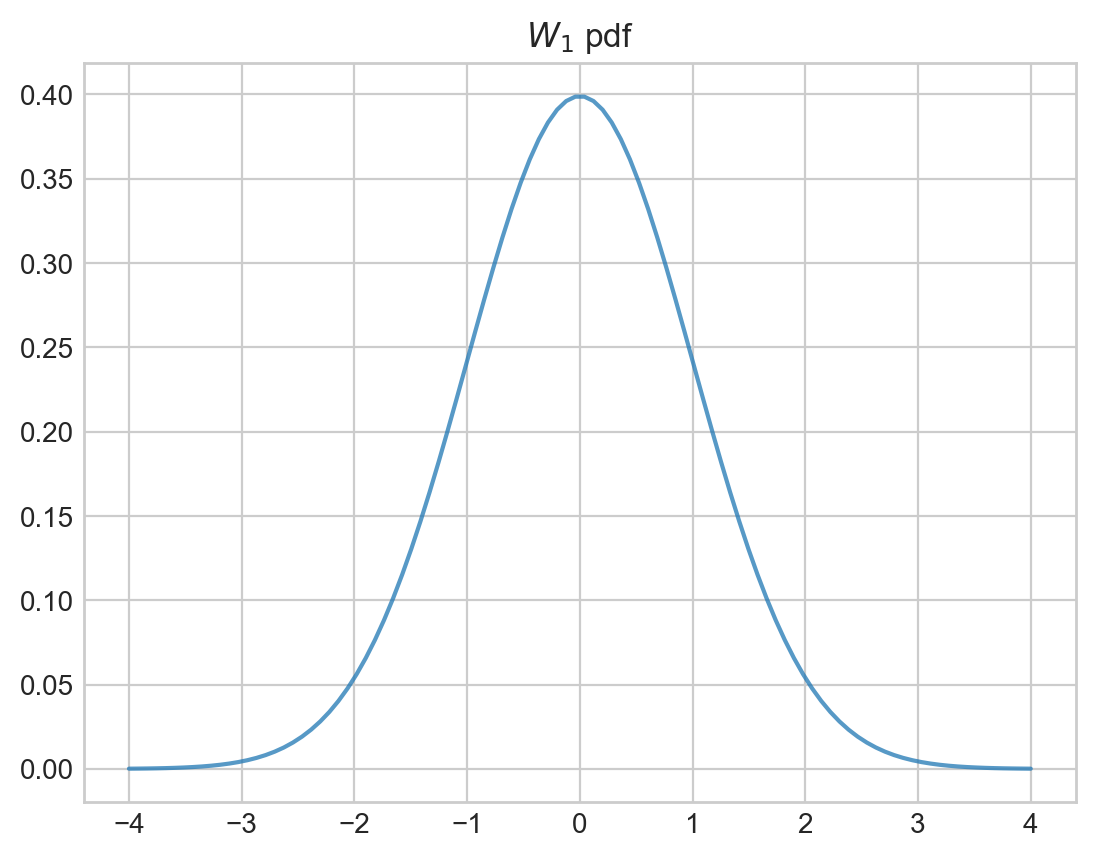

In [77]:
process = BrownianMotion()
W_1 = process.get_marginal(t=1)
x = np.linspace(-4, 4,100)
plt.plot(x, W_1.pdf(x), '-', lw=1.5, alpha=0.75, label=f'$t$={1:.2f}')
plt.title(f'$W_1$ pdf')
plt.show()

Let's take a look at the probability density functions for different marginal distributions $W_t$.

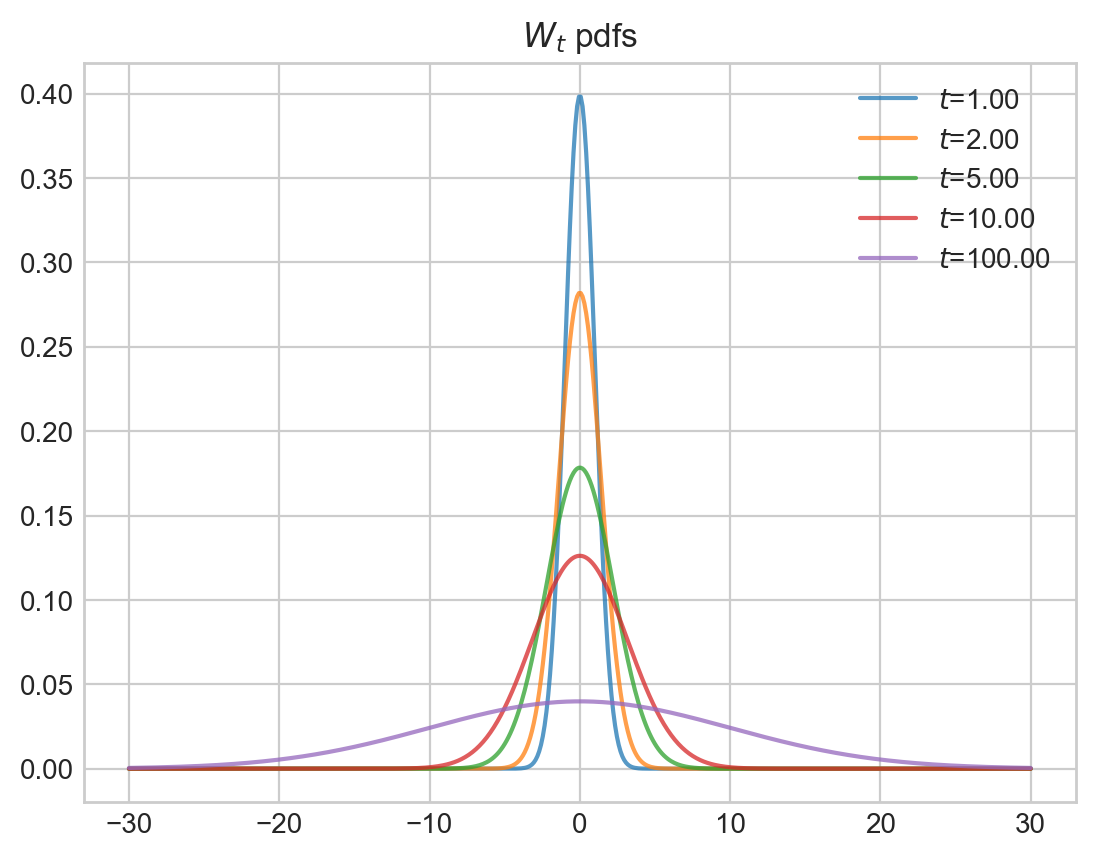

In [78]:
fig, ax1 = plt.subplots(1, 1)
for t in [1,2,5, 10, 100]:
    W_t= process.get_marginal(t)
    x = np.linspace(-30, 30, 500)
    ax1.plot(x, W_t.pdf(x), '-', lw=1.5,
             alpha=0.75, label=f'$t$={t:.2f}')
ax1.legend()
plt.title('$W_t$ pdfs')
plt.show()

From this chart, we can make the following observations:

- We clearly see the characteristic symmetric bell-shaped curves of the normal/Gaussian distributions
- The Brownian motion will clearly take positive and negative values 
- The Brownian motion would take bigger (in magnitude) values as $t$ increases
- The marginal distributions of the Brownian Motion flatten/spread as $t$ increases. Indeed, it will ultimately become uniform in the limit when time goes to infinity

## Simulation

In order to simulate paths from a stochastic process, we need to set a discrete partition over an interval for the simulation to take place. For simplicity, we are going to consider an equidistant partition of size $n$ over $[0,T]$, i.e.:
\begin{equation}
t_i = \frac{i}{n-1} T \qquad  \hbox{for } i = 0, \cdots, n-1.
\end{equation}
Then, the goal is to simulate a path of the form $\{ W_{t_i}, i=1,\cdots, n-1\}$. There are different ways to do this. Here, we are going to use the fact tha we can express each $W_{t_i}$ as follows:
\begin{align*}
W_0 &= 0 \\
W_{t_1} = (W_{t_1} - W_0)  + W_0 & \sim N\left(0,\frac{T}{n-1}\right) \\
W_{t_2} = (W_{t_2} - W_{t_1}) + W_{t_1} &  \sim N\left(0,\frac{T}{n-1}\right) + W_{t_1}    \\ 
W_{t_3} = (W_{t_3} - W_{t_2}) + W_{t_2}  & \sim N\left(0,\frac{T}{n-1}\right) + W_{t_2}    \\ 
 & \cdots & \\
 W_{t_{n-1}} = (W_{t_{n-1}} - W_{t_{n-2}}) + W_{t_{n-2}}& \sim N\left(0,\frac{T}{n-1}\right) + W_{t_{n-2}}. 
\end{align*}
Thus, we can built the path by simply simulating from a normal distribution $N(0,\frac{T}{n-1})$ and then taking the cumulative sum.

First, we construct the partition, using `np.linspace`, and calculate the standard deviation of the normal distribution, i.e.:

$$\sigma = \sqrt{\frac{T}{n-1}}.$$

In [79]:
T = 1.0
n = 100
times = np.linspace(0, T, n)
sigma = np.sqrt( T/(n-1) )
print(sigma)

0.10050378152592121


Now we simulate from the normal distribution $\mathcal{N}(0, \frac{T}{n-1})$, and calculate the cumulative sum:

In [80]:
normal_increments = norm.rvs(loc=0, scale=sigma, size=n-1)
normal_increments = np.insert(normal_increments, 0, 0) # This is the initial point
Wt = normal_increments.cumsum()

Let's plot our simulated path!

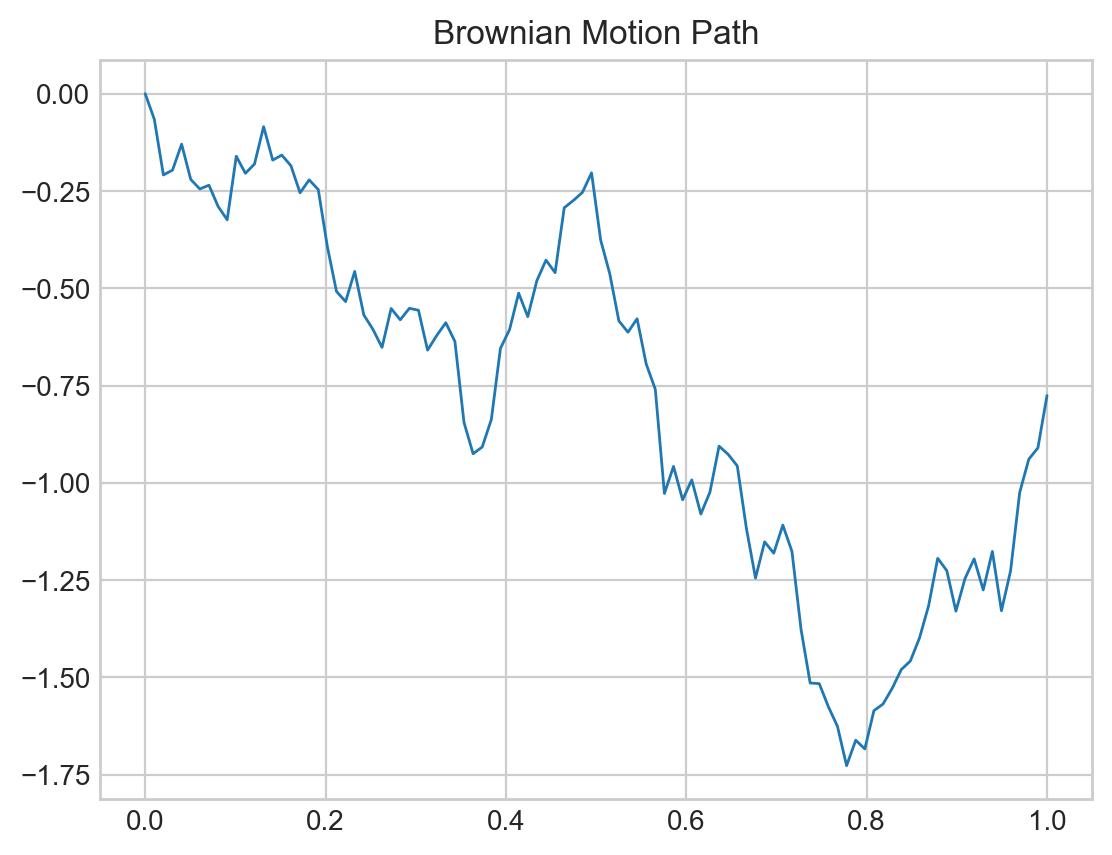

In [81]:
plt.plot(times, Wt, '-', lw=1)
plt.title('Brownian Motion Path')
plt.show()

To simulate several paths from a Brownian Motion and visualise them we can simply use the method `plot` from the `aleatory` library. Here, we simulate 10 paths over the interval $[0,1]$. Note that the number of points on the partition is defined by the parameter $n$.

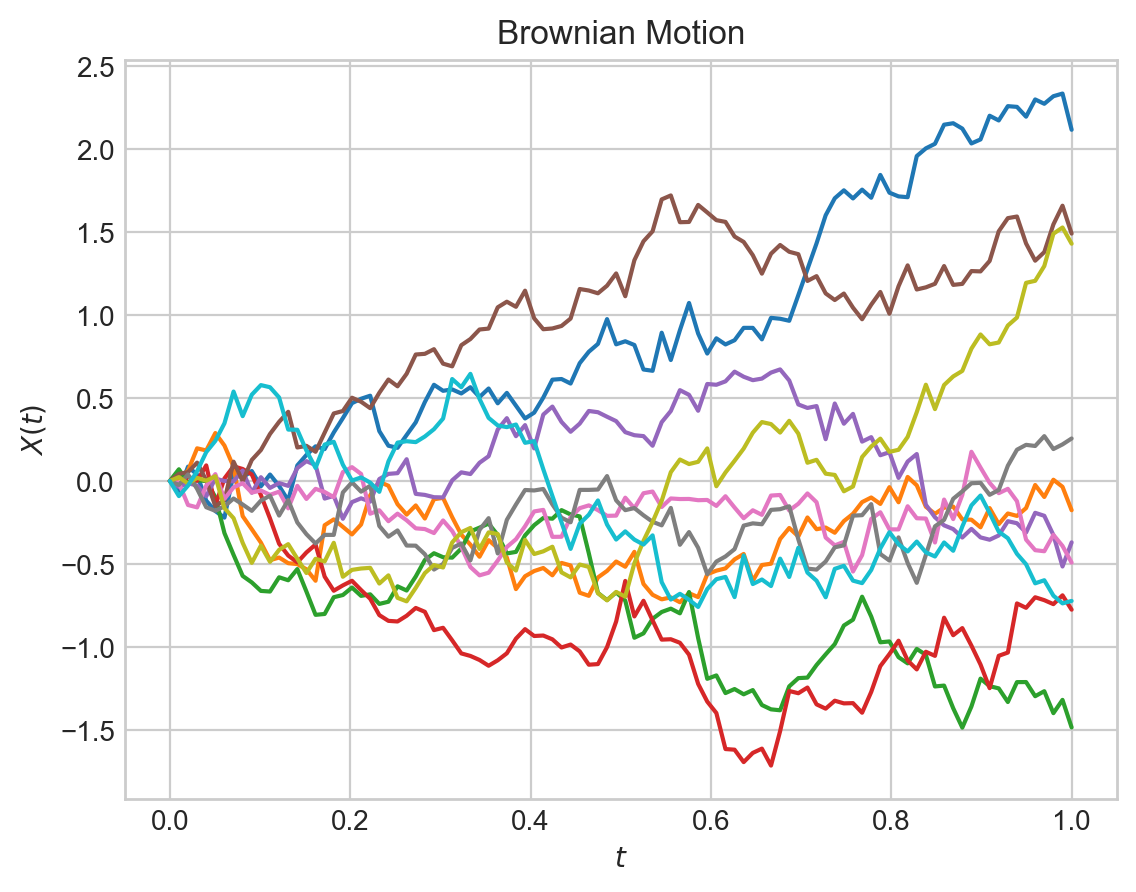

In [82]:
process = BrownianMotion()
process.plot(n=100, N=10)
plt.show()

Next, we define the Brownian Motion over the interval $[0, 10]$ and simulate 50 paths with a partition of size 100.

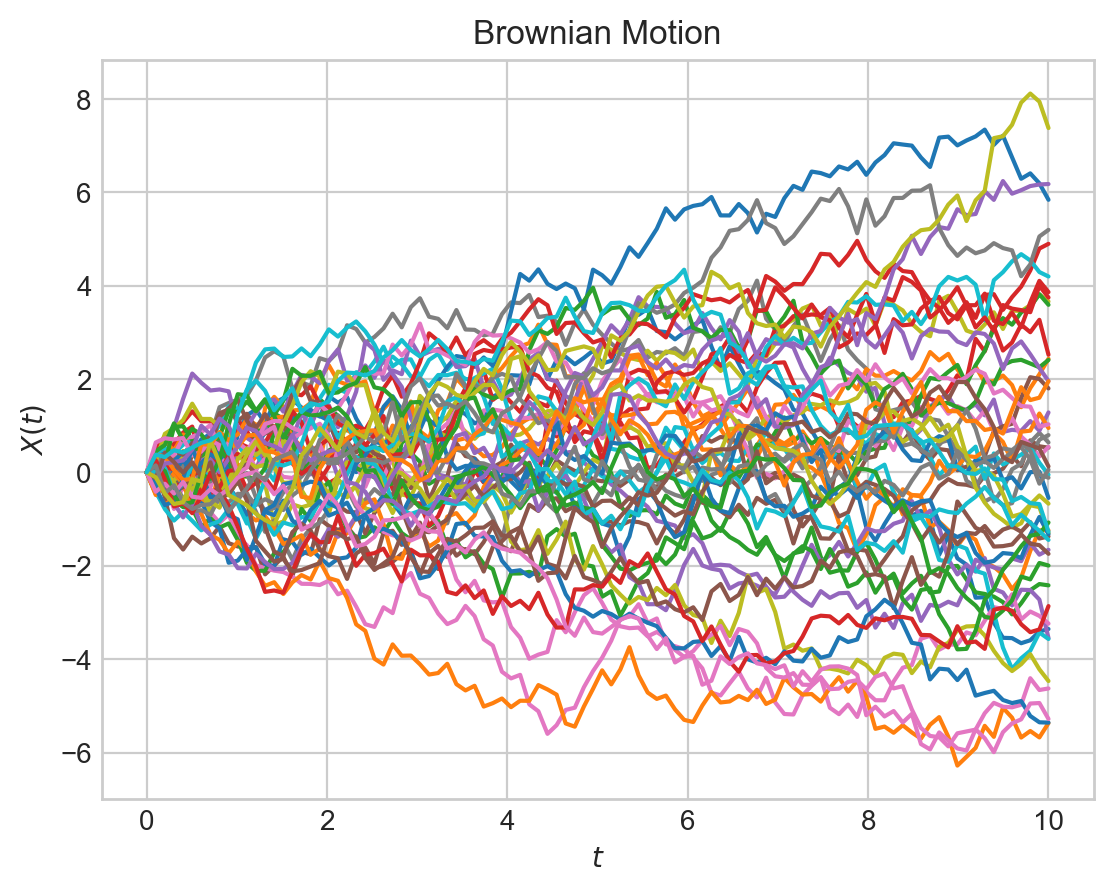

In [83]:
process = BrownianMotion(T=10)
process.plot(n=100, N=50)
plt.show()

### Expectation,  Variance, and Covariance

Once again, using the fact that $W_t \sim \mathcal{N}(0, t)$, it follows that
\begin{equation*}
\mathbf{E} [W_t] = 0 \qquad \forall t\geq 0,
\end{equation*}
and 
\begin{equation*}
\mathbf{Var} [W_t] = t \qquad \forall t> 0.
\end{equation*}

Moreover, for any $ t>s >0$, we have
\begin{align*}
\mathbf{Cov} [W_t, W_s] 
                        &= \mathbf{E} [W_t W_s]  =  \mathbf{E} [(W_t-W_s)W_s +  W_s^2]  \\  
                        &= \mathbf{E} [(W_t-W_s)]\mathbf{E}[W_s] +  \mathbf{E}[W_s^2]  \\
                        &= s,\\  
\end{align*}
where the second equality follows by simply using the linearity of the expectation and independent increments property. 


## Long Time Behaviour

Almost surely 

$$\lim_{t \rightarrow \infty} \frac{W_t}{t}  = 0.$$

This property is the analogous of the Law of Large Numbers and sometimes is referred as such. 

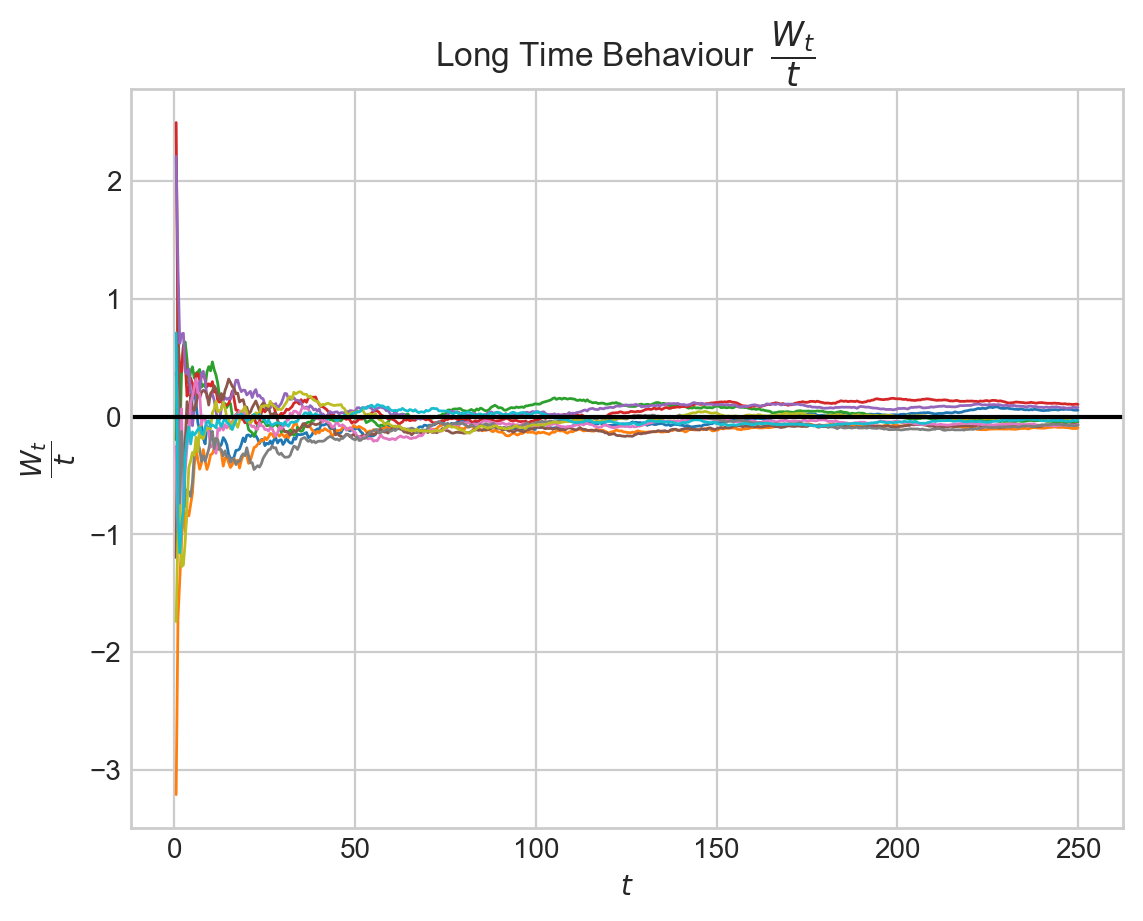

In [84]:
process = BrownianMotion(T=250)
paths = process.simulate(n=500, N=10)
t = process.times

for w in paths:
    plt.plot(t[1:], w[1:]/t[1:], '-', lw=1)
plt.axhline(y=0, lw=1.5, color='black')
plt.title('Long Time Behaviour  $\dfrac{W_t}{t}$ ')
plt.xlabel('$t$')
plt.ylabel('$\dfrac{W_t}{t}$')
plt.show()
    

## Reflection Principle

If $W_t$ is a Brownian motion and $a>0$, then 
\begin{equation}
P\left( \sup_{0\leq s  \leq t} W_s \geq a \right) = 2P(W_t\geq a)
\end{equation}

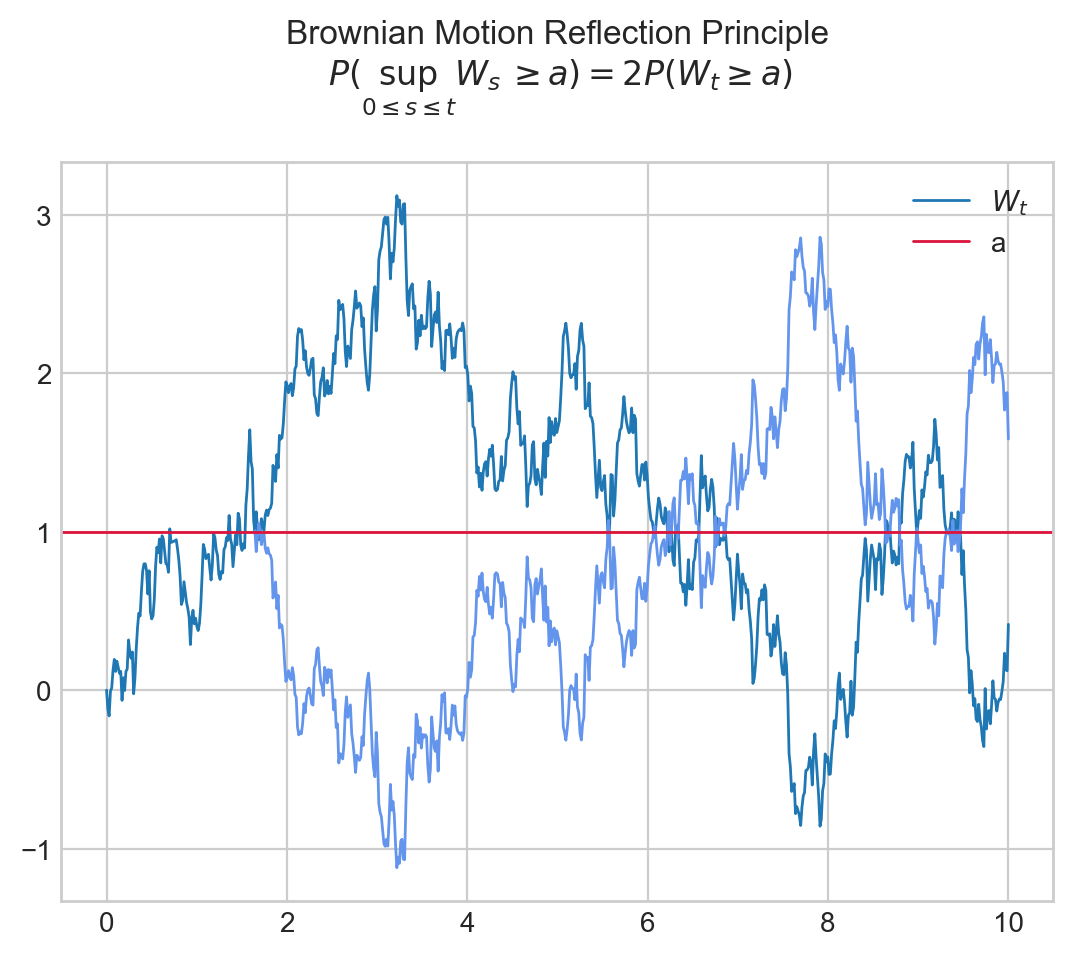

In [85]:
process = BrownianMotion(T=10, rng=np.random.default_rng(seed=123))
bms = process.sample(n=700)
ts = process.times
a = 1.0
fht = np.where(np.isclose(bms, a, rtol=0.01))[0][0]
plt.figure()
plt.plot(ts, bms, '-', lw=1, label="$W_t$")
plt.plot(ts[fht:], -bms[fht:] + 2*a, '-', lw=1, color='cornflowerblue')
plt.axhline(y=a, lw=1, color='crimson', label='a')
plt.title(
    'Brownian Motion Reflection Principle\n $P(\sup_{0\leq s  \leq t} W_s \geq a ) = 2P(W_t\geq a)$ \n')
plt.legend()
plt.show()

Finally, let's take a look at the following chart showing 100 simulated paths over the interval $[0,10]$.

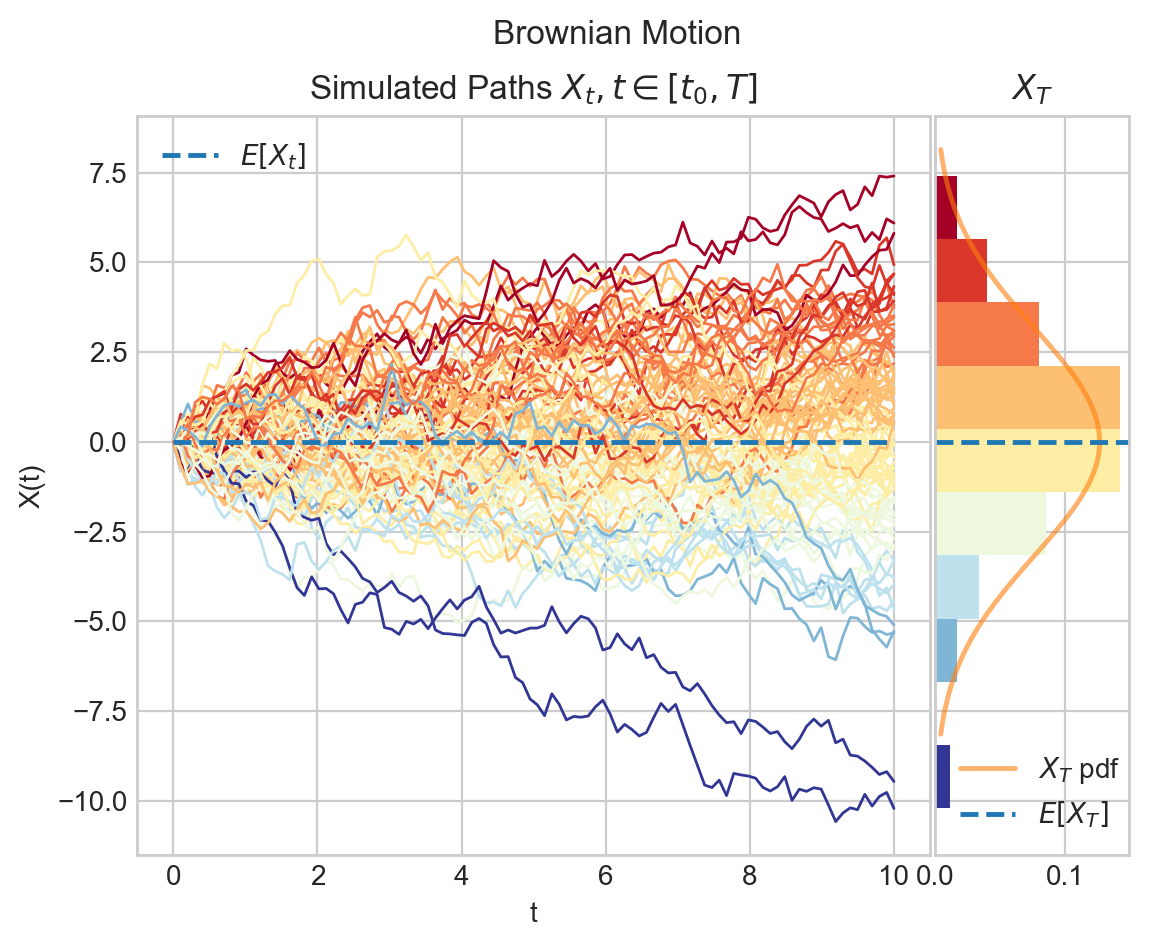

In [86]:
process = BrownianMotion(T=10)
process.draw(n=100, N=100)
plt.show()

## References and Further Reading

- [The Brownian Movement](https://feynmanlectures.caltech.edu/I_41.html) by Feynman, R. (1964) in "The Feynman Lectures of Physics", Volume I. pp. 41–1.
